# 데이터 확인 및 전처리

In [24]:
import pandas as pd 
df = pd.read_csv('BankCustomer.csv')

In [25]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10000 non-null  object 
 1   Gender        10000 non-null  object 
 2   Age           10000 non-null  int64  
 3   City          10000 non-null  object 
 4   Tenure        10000 non-null  int64  
 5   ProductsNo    10000 non-null  int64  
 6   HasCard       10000 non-null  int64  
 7   ActiveMember  10000 non-null  int64  
 8   Credit        10000 non-null  int64  
 9   AccountBal    10000 non-null  float64
 10  Salary        10000 non-null  float64
 11  Exited        10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


Name            0
Gender          0
Age             0
City            0
Tenure          0
ProductsNo      0
HasCard         0
ActiveMember    0
Credit          0
AccountBal      0
Salary          0
Exited          0
dtype: int64

# 타킷 확인

In [26]:
df["Exited"].value_counts(normalize=True)


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

# 전처리

In [27]:
df = df.drop("Name", axis=1)


In [28]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})


In [29]:
df = pd.get_dummies(df, columns=["City"], drop_first=True)


# 시각화

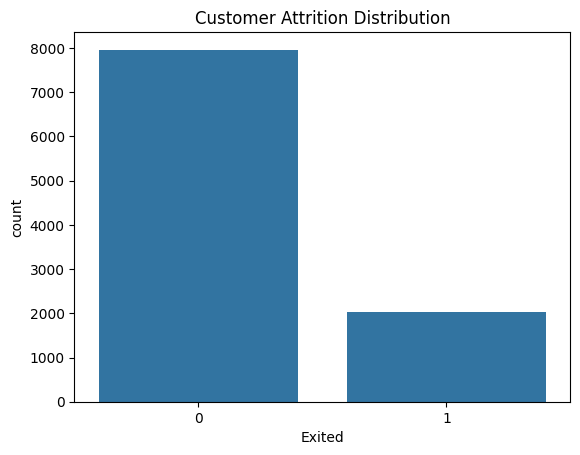

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Exited")
plt.title("Customer Attrition Distribution")
plt.show()


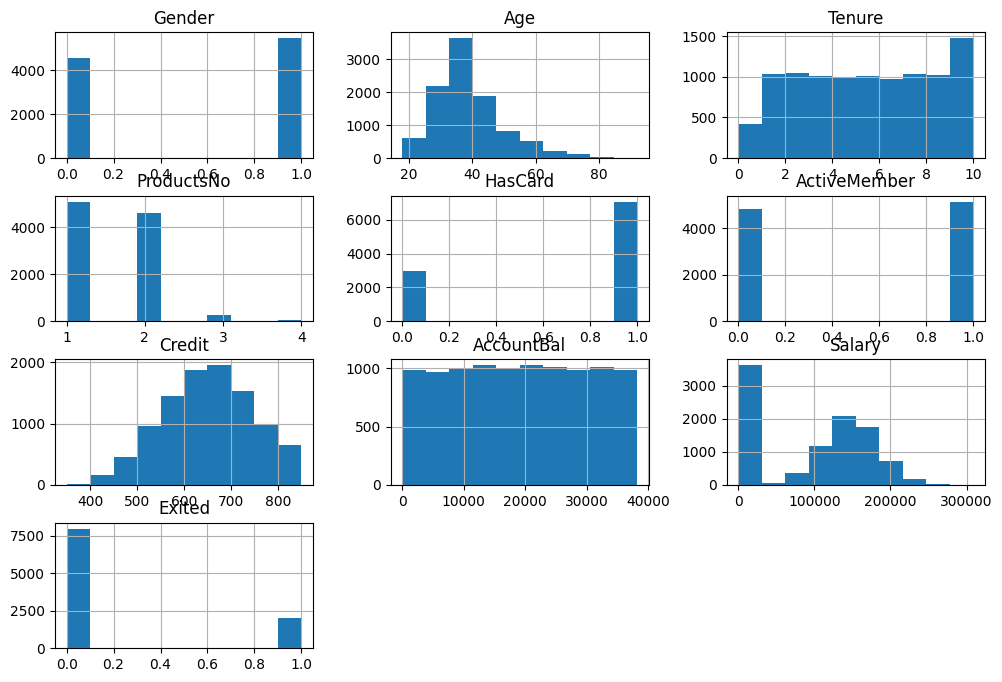

In [31]:
df.hist(figsize=(12, 8))
plt.show()


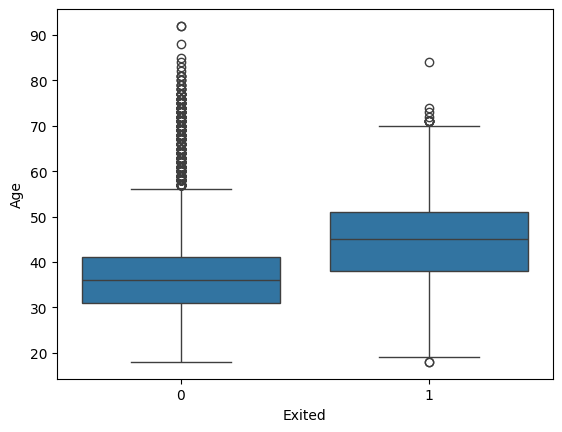

In [32]:
sns.boxplot(data=df, x="Exited", y="Age")
plt.show()


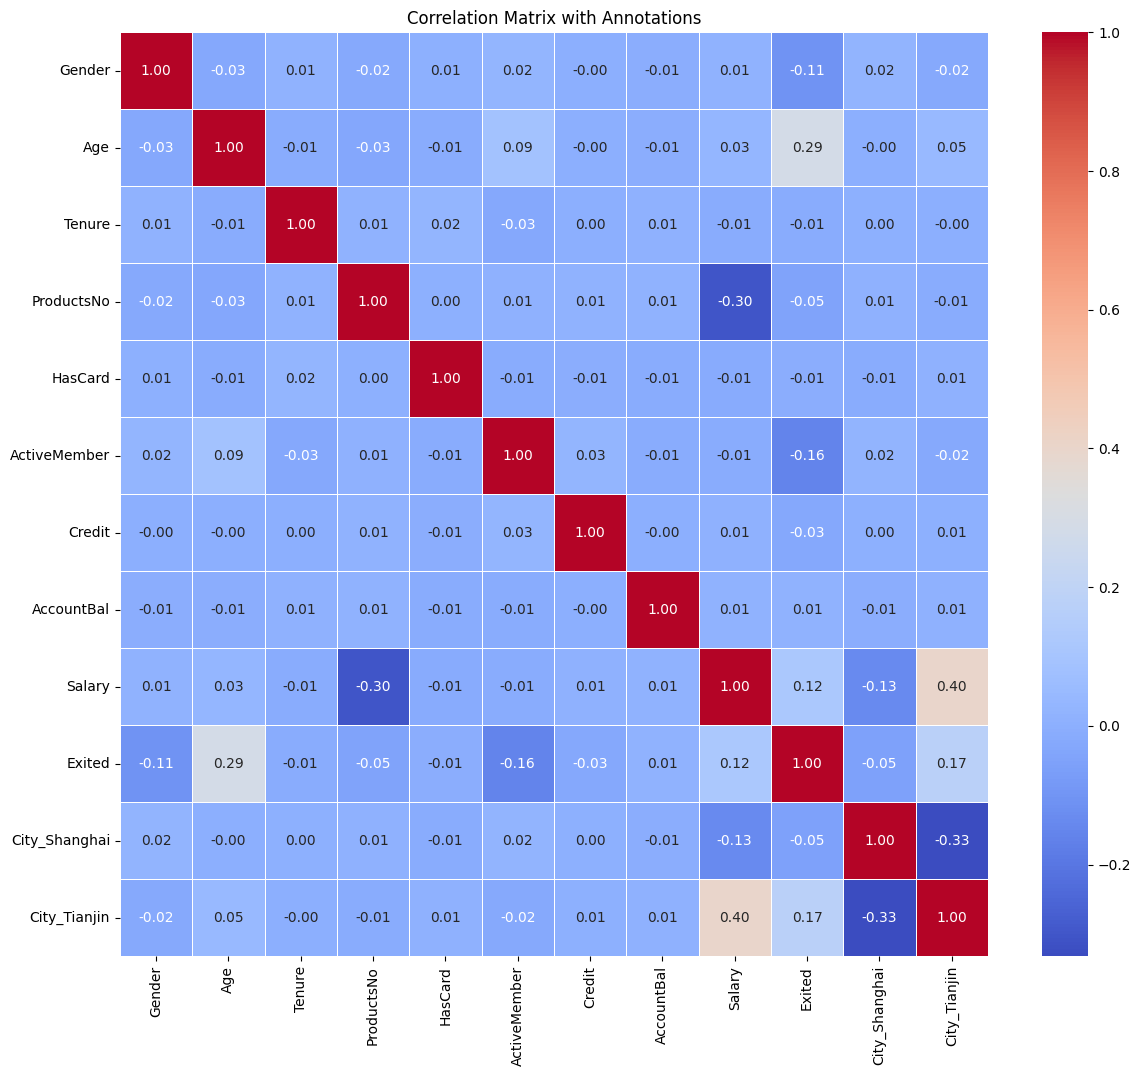

In [33]:
plt.figure(figsize=(14, 12))
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Annotations")
plt.show()


# Train / Test

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 모델링

In [36]:
from sklearn.linear_model import LogisticRegression

log_l2 = LogisticRegression(penalty="l2", max_iter=1000)
log_l2.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [37]:
log_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
log_l1.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [38]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True)

# 모델평가

In [39]:
from sklearn.metrics import classification_report, roc_auc_score

pred_l1 = log_l1.predict(X_test_scaled)
print("L1 Logistic Regression:")
print(classification_report(y_test, pred_l1))
print("AUC:", roc_auc_score(y_test, log_l1.predict_proba(X_test_scaled)[:,1]))

# L2
pred_l2 = log_l2.predict(X_test_scaled)
print("L2 Logistic Regression:")
print(classification_report(y_test, pred_l2))
print("AUC:", roc_auc_score(y_test, log_l2.predict_proba(X_test_scaled)[:,1]))

# SVM
pred_svm = svm_model.predict(X_test_scaled)
print("\nSVM:")
print(classification_report(y_test, pred_svm))
print("AUC:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:,1]))


L1 Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.57      0.17      0.27       407

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000

AUC: 0.7574755032382152
L2 Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.57      0.17      0.27       407

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000

AUC: 0.7574323167543506

SVM:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.78      0.34      0.47       407

    accuracy                           0.85      2000
   macro avg       0.82   

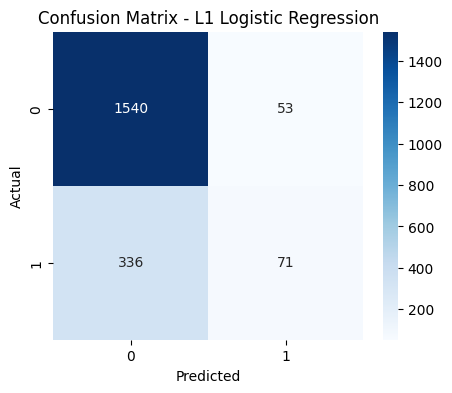

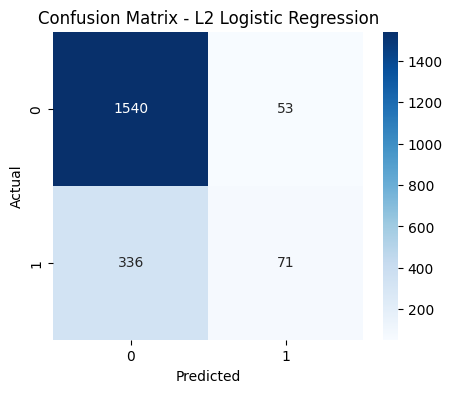

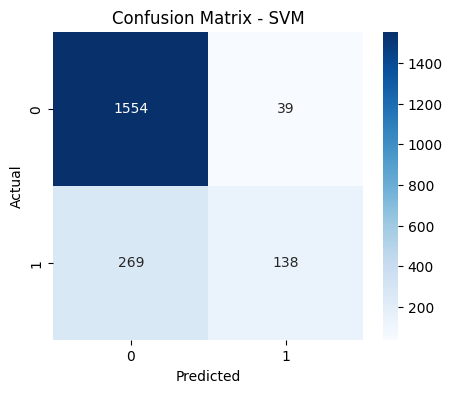

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# L1 Logistic Regression Confusion Matrix
plot_confusion(y_test, pred_l1, "Confusion Matrix - L1 Logistic Regression")

# L2 Logistic Regression Confusion Matrix
plot_confusion(y_test, pred_l2, "Confusion Matrix - L2 Logistic Regression")

# SVM Confusion Matrix
plot_confusion(y_test, pred_svm, "Confusion Matrix - SVM")
